<a href="https://www.kaggle.com/code/hariharan0708/hand-sign-identification?scriptVersionId=133501288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/hand-sign-dataset/sign_mnist_test.csv
/kaggle/input/hand-sign-dataset/sign_mnist_train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import string


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train_set = pd.read_csv("/kaggle/input/hand-sign-dataset/sign_mnist_train.csv")

In [4]:
train_set

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
strlabels=list(string.ascii_uppercase) 
strlabels.remove("J")
print(strlabels) 

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [6]:
train_set = np.array(train_set)
train_set.shape

(27455, 785)

In [7]:
train_batch = train_set.T

train_images = train_batch[1: ].T
train_labels = train_batch[0].T


In [8]:
train_labels[0]

3

In [9]:
train_images = train_images / 255

In [10]:
train_images

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [11]:
train_images = train_images.reshape(-1, 28, 28)

In [12]:
train_images[0].shape

(28, 28)

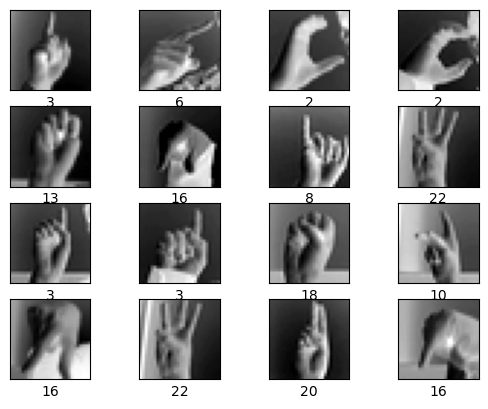

In [13]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()

In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu",padding="same", input_shape=(28,28,1)),
    MaxPool2D((2,2), strides=2),
    Conv2D(64, (3,3), activation="relu",padding="same"),
    MaxPool2D((2,2), strides=2),
    Flatten(),
    Dense(25, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 25)                7

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.fit(x=train_images, y=train_labels, epochs=20, verbose=2)

Epoch 1/20
858/858 - 16s - loss: 2.4286 - accuracy: 0.3668 - 16s/epoch - 19ms/step
Epoch 2/20
858/858 - 16s - loss: 0.9340 - accuracy: 0.7541 - 16s/epoch - 18ms/step
Epoch 3/20
858/858 - 16s - loss: 0.5301 - accuracy: 0.8593 - 16s/epoch - 18ms/step
Epoch 4/20
858/858 - 16s - loss: 0.3586 - accuracy: 0.9038 - 16s/epoch - 18ms/step
Epoch 5/20
858/858 - 16s - loss: 0.2506 - accuracy: 0.9364 - 16s/epoch - 18ms/step
Epoch 6/20
858/858 - 16s - loss: 0.1789 - accuracy: 0.9579 - 16s/epoch - 19ms/step
Epoch 7/20
858/858 - 16s - loss: 0.1252 - accuracy: 0.9753 - 16s/epoch - 19ms/step
Epoch 8/20
858/858 - 16s - loss: 0.0860 - accuracy: 0.9877 - 16s/epoch - 19ms/step
Epoch 9/20
858/858 - 16s - loss: 0.0588 - accuracy: 0.9936 - 16s/epoch - 19ms/step
Epoch 10/20
858/858 - 16s - loss: 0.0411 - accuracy: 0.9970 - 16s/epoch - 19ms/step
Epoch 11/20
858/858 - 16s - loss: 0.0275 - accuracy: 0.9990 - 16s/epoch - 19ms/step
Epoch 12/20
858/858 - 16s - loss: 0.0194 - accuracy: 0.9995 - 16s/epoch - 19ms/step
E

In [18]:
test_set = np.array(pd.read_csv("/kaggle/input/hand-sign-dataset/sign_mnist_test.csv")).T

In [19]:
test_lbl = test_set[0].T
test_img = test_set[1: ].T

In [20]:
test_lbl

array([ 6,  5, 10, ...,  2,  4,  2])

In [21]:
test_img = test_img / 255

In [22]:
test_img = test_img.reshape(-1, 28, 28)

In [23]:
test_img.shape

(7172, 28, 28)

In [24]:
pred = model.predict(x=test_img, verbose=0)

In [25]:
cm = confusion_matrix(y_true=test_lbl, y_pred=np.argmax(pred, axis=-1))

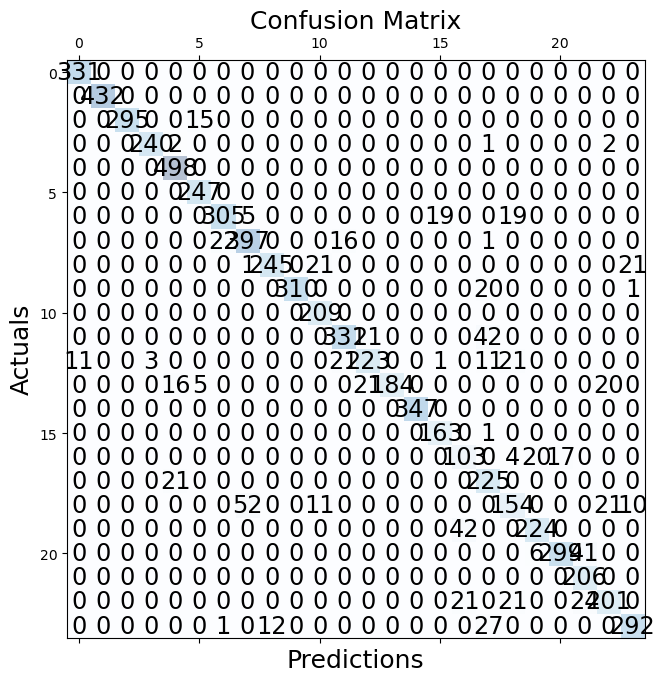

In [26]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [27]:
r = np.flip(cm)

acc = (r[0][0] + r[-1][-1]) / np.sum(r)
print(acc)

0.08686558839933073


In [28]:
y_pred=np.argmax(pred, axis=-1)
for i in range(20, 40):
    print("Actual Letter: " + strlabels[test_lbl[i]] + "\tPredicted letter: " + strlabels[y_pred[i]])

Actual Letter: C	Predicted letter: C
Actual Letter: A	Predicted letter: A
Actual Letter: W	Predicted letter: W
Actual Letter: E	Predicted letter: E
Actual Letter: L	Predicted letter: L
Actual Letter: Q	Predicted letter: Q
Actual Letter: C	Predicted letter: C
Actual Letter: Q	Predicted letter: Q
Actual Letter: H	Predicted letter: H
Actual Letter: B	Predicted letter: B
Actual Letter: H	Predicted letter: H
Actual Letter: I	Predicted letter: I
Actual Letter: O	Predicted letter: O
Actual Letter: U	Predicted letter: U
Actual Letter: D	Predicted letter: D
Actual Letter: W	Predicted letter: W
Actual Letter: O	Predicted letter: A
Actual Letter: D	Predicted letter: D
Actual Letter: T	Predicted letter: T
Actual Letter: P	Predicted letter: P
